# Machine Learning Model for evaluating to give loan to a person or not based on the  fraudent information

In [2]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score       #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#saving the model using joblib
import pickle
#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#acquiring the data
loan_df=pd.read_csv("loan_prediction.csv")

In [4]:
#analysing the data
print(loan_df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [5]:
#previewing the data
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#checking the structure of the dataset
loan_df.shape

(614, 13)

In [7]:
#extracting the general information from the dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#converting sting data to int or float data using label encoder
from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder() 
#for col in loan_df.columns:
#    loan_df.iloc[col] = le_x.fit_transform(loan_df.iloc[col])
for col in loan_df.columns:
    if col in loan_df.columns:
        i = loan_df.columns.get_loc(col)
        loan_df.iloc[:,i] = loan_df.apply(lambda i:le_x.fit_transform(i.astype(str)), axis=0, result_type='expand')
loan_df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
194,194,1,0,0,0,0,329,0,20,6,1,0,1
532,532,1,0,2,0,0,258,0,10,6,0,0,0
573,573,1,1,2,1,0,436,55,80,7,1,1,0
379,379,1,1,2,0,0,399,0,30,6,1,2,1
391,391,1,1,3,0,0,498,0,119,6,1,0,1


In [10]:
#imputer functions(handling null values)
loan_df['Gender'].fillna(loan_df['Gender'].mean(),inplace=True)
loan_df['Married'].fillna(loan_df['Married'].mean(),inplace=True)
loan_df['Dependents'].fillna(loan_df['Dependents'].mean(),inplace=True)
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mean(),inplace=True)
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mean(),inplace=True)
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mean(),inplace=True)

In [11]:
loan_df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
233,233,0,0,0,0,0,485,0,121,6,1,1,1
235,235,1,1,1,0,0,403,21,68,6,1,0,1
442,442,1,0,3,1,0,365,101,47,6,1,1,1
590,590,1,1,0,0,0,180,206,163,2,1,1,1
500,500,0,0,0,0,0,450,217,13,7,1,0,1


In [12]:
#checking the mode value for the mentioned column
loan_df['LoanAmount'].mode()

0    203
dtype: int32

In [13]:
loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].mode(),inplace=True)

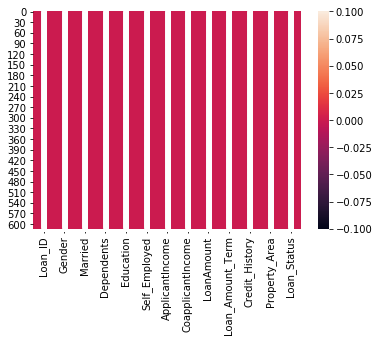

In [14]:
#visualizing the null values through heatmap
sns.heatmap(loan_df.isnull(),annot=True)

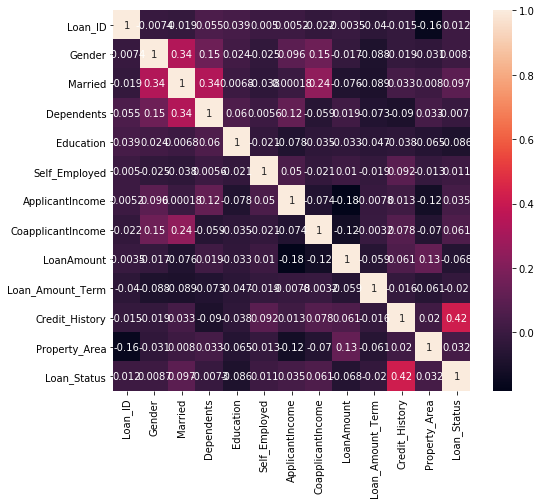

In [15]:
#checking for the correlation
corr_hmap=loan_df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)

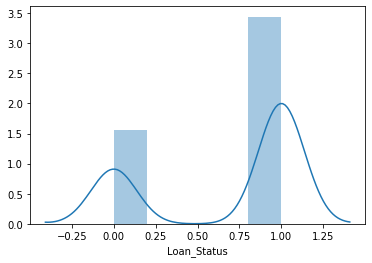

In [16]:
sns.distplot(loan_df['Loan_Status'])

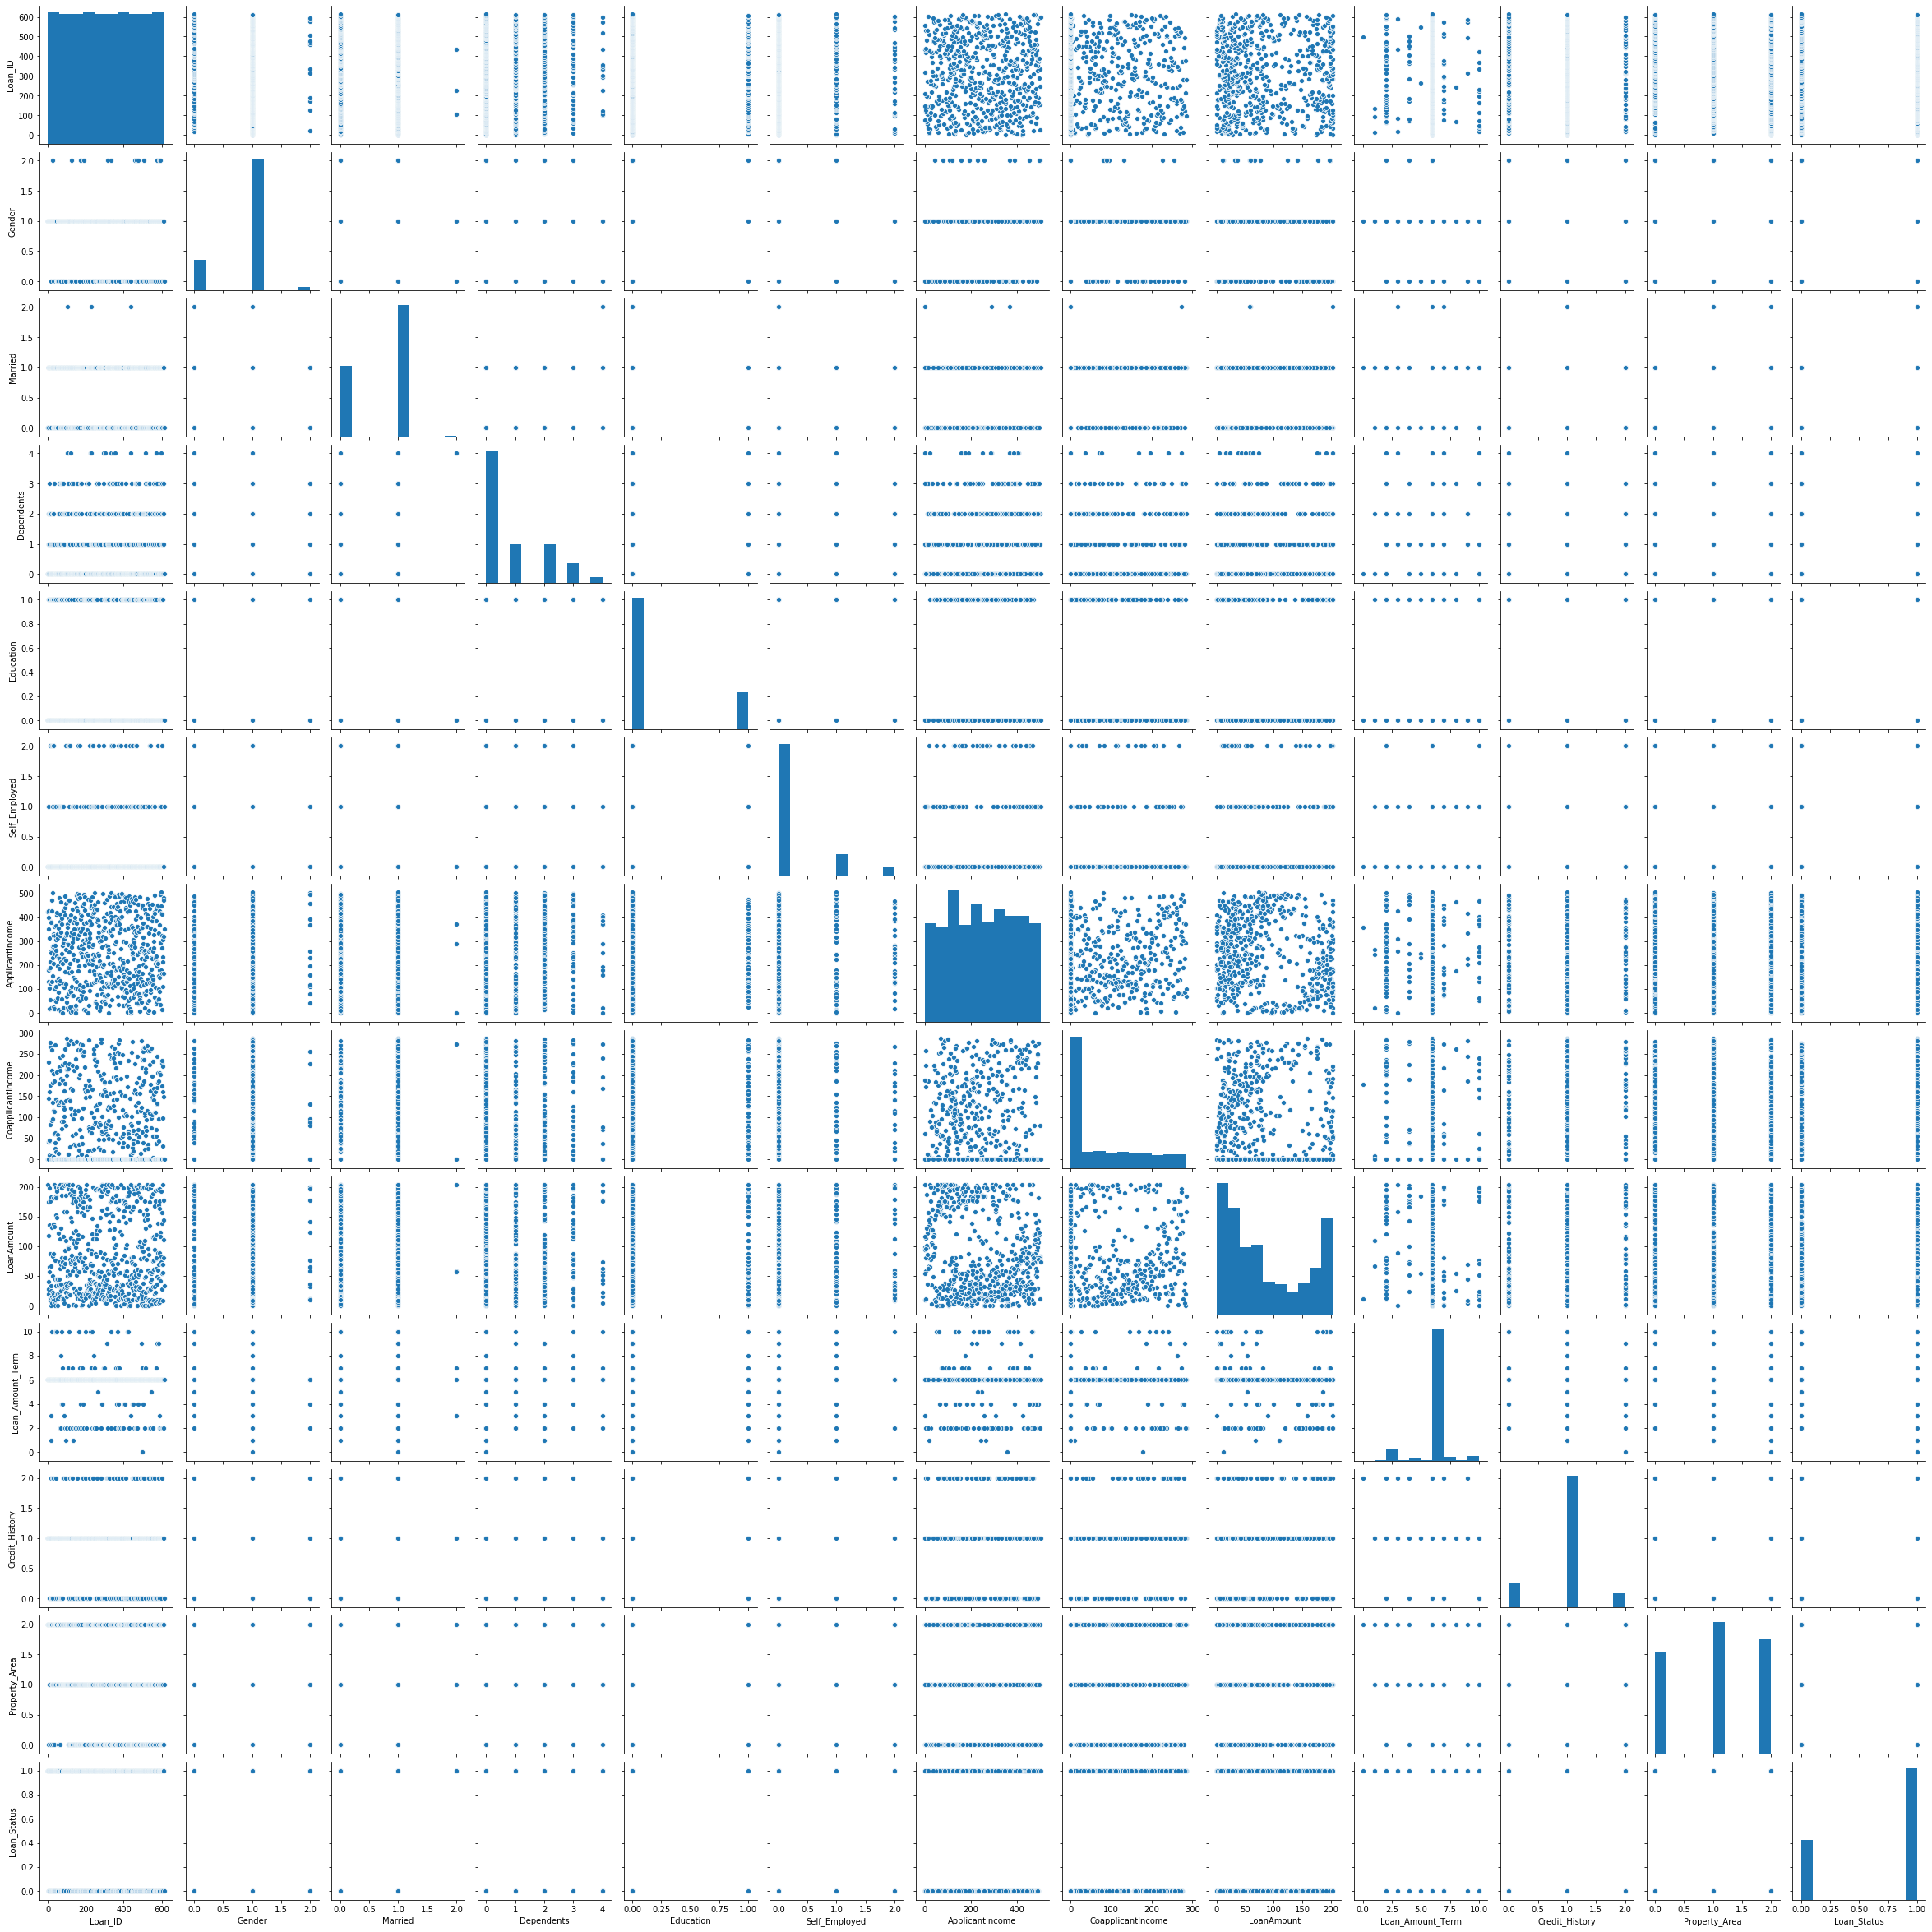

In [17]:
#multiplot visualization
sns.pairplot(loan_df)

Loan_ID                 AxesSubplot(0.125,0.749828;0.168478x0.130172)
Gender               AxesSubplot(0.327174,0.749828;0.168478x0.130172)
Married              AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Dependents           AxesSubplot(0.731522,0.749828;0.168478x0.130172)
Education               AxesSubplot(0.125,0.593621;0.168478x0.130172)
Self_Employed        AxesSubplot(0.327174,0.593621;0.168478x0.130172)
ApplicantIncome      AxesSubplot(0.529348,0.593621;0.168478x0.130172)
CoapplicantIncome    AxesSubplot(0.731522,0.593621;0.168478x0.130172)
LoanAmount              AxesSubplot(0.125,0.437414;0.168478x0.130172)
Loan_Amount_Term     AxesSubplot(0.327174,0.437414;0.168478x0.130172)
Credit_History       AxesSubplot(0.529348,0.437414;0.168478x0.130172)
Property_Area        AxesSubplot(0.731522,0.437414;0.168478x0.130172)
Loan_Status             AxesSubplot(0.125,0.281207;0.168478x0.130172)
dtype: object

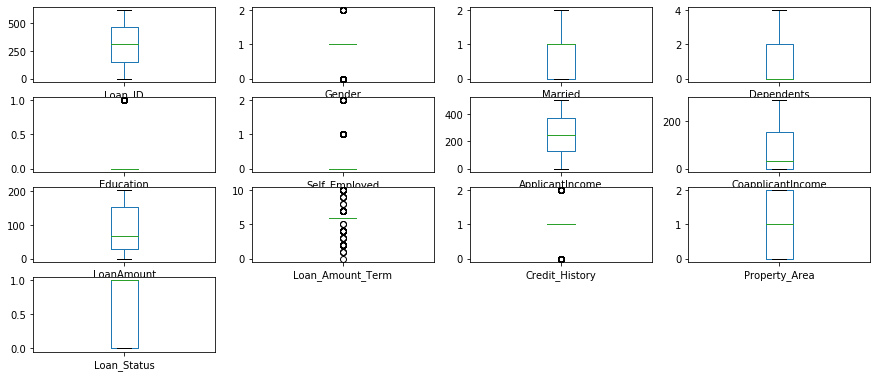

In [18]:
#checking for the outliers
loan_df.plot(kind='box',subplots=True,layout=(5,4),figsize=(15,8))

In [19]:
#checking the skewness before removing the outliers
loan_df.skew()

Loan_ID              0.000000
Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      0.013683
CoapplicantIncome    0.807411
LoanAmount           0.491875
Loan_Amount_Term    -1.102014
Credit_History      -0.199751
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [20]:
#removing outliers
z_score=np.abs(zscore(loan_df))
print(loan_df.shape)
loan_df_final=loan_df.loc[(z_score<3).all(axis=1)]
print(loan_df_final.shape)

(614, 13)
(565, 13)


In [21]:
#checking the skewness after removing the outliers
loan_df_final.skew()

Loan_ID             -0.018769
Gender              -0.925462
Married             -0.553108
Dependents           1.059301
Education            1.397249
Self_Employed        2.082659
ApplicantIncome      0.030057
CoapplicantIncome    0.826857
LoanAmount           0.485114
Loan_Amount_Term    -2.324564
Credit_History      -0.237631
Property_Area       -0.052810
Loan_Status         -0.807301
dtype: float64

In [22]:
#Now separating input and output variable
x=loan_df_final.drop(['Loan_Status'],axis=1)
y=loan_df_final['Loan_Status']
print(x.shape)
print(y.shape)

(565, 12)
(565,)


In [23]:
#standardizing the input dataset 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.75876425,  0.36967612, -1.37260461, ...,  0.26163875,
         0.1483587 ,  1.23854538],
       [-1.7531    ,  0.36967612,  0.695453  , ...,  0.26163875,
         0.1483587 , -1.31538944],
       [-1.74743575,  0.36967612,  0.695453  , ...,  0.26163875,
         0.1483587 ,  1.23854538],
       ...,
       [ 1.70209169,  0.36967612,  0.695453  , ...,  0.26163875,
         0.1483587 ,  1.23854538],
       [ 1.70775593,  0.36967612,  0.695453  , ...,  0.26163875,
         0.1483587 ,  1.23854538],
       [ 1.71342018, -2.00381259, -1.37260461, ...,  0.26163875,
        -2.00094039, -0.03842203]])

In [24]:
#Machine Learning Models
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

In [25]:

accuracy_results = []
names = []
for name, model in models:
    print(name)
    max_acc_score=0
    for r_state in range(42,151):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.10)
        model_name=model
        model_name.fit(x_train,y_train)
        y_pred=model_name.predict(x_test)
        accuracy_scr=accuracy_score(y_test,y_pred)
        print("random state: ",r_state," accuracy score: ",accuracy_scr)
        if accuracy_scr>max_acc_score:
            max_acc_score=accuracy_scr      
            final_r_state=r_state
    accuracy_results.append(max_acc_score*100)
    print()
    print("max accuracy score at random state:",final_r_state," for the model ",name," is: ",max_acc_score)
    print()
    print()

LR
random state:  42  accuracy score:  0.8596491228070176
random state:  43  accuracy score:  0.7719298245614035
random state:  44  accuracy score:  0.8070175438596491
random state:  45  accuracy score:  0.8421052631578947
random state:  46  accuracy score:  0.8070175438596491
random state:  47  accuracy score:  0.8947368421052632
random state:  48  accuracy score:  0.8421052631578947
random state:  49  accuracy score:  0.8070175438596491
random state:  50  accuracy score:  0.7543859649122807
random state:  51  accuracy score:  0.8245614035087719
random state:  52  accuracy score:  0.7894736842105263
random state:  53  accuracy score:  0.8245614035087719
random state:  54  accuracy score:  0.8070175438596491
random state:  55  accuracy score:  0.7894736842105263
random state:  56  accuracy score:  0.8771929824561403
random state:  57  accuracy score:  0.8245614035087719
random state:  58  accuracy score:  0.8245614035087719
random state:  59  accuracy score:  0.7894736842105263
random 

random state:  89  accuracy score:  0.7017543859649122
random state:  90  accuracy score:  0.7543859649122807
random state:  91  accuracy score:  0.7719298245614035
random state:  92  accuracy score:  0.8070175438596491
random state:  93  accuracy score:  0.6842105263157895
random state:  94  accuracy score:  0.7543859649122807
random state:  95  accuracy score:  0.7543859649122807
random state:  96  accuracy score:  0.6666666666666666
random state:  97  accuracy score:  0.8070175438596491
random state:  98  accuracy score:  0.7543859649122807
random state:  99  accuracy score:  0.7894736842105263
random state:  100  accuracy score:  0.6140350877192983
random state:  101  accuracy score:  0.7543859649122807
random state:  102  accuracy score:  0.7192982456140351
random state:  103  accuracy score:  0.6842105263157895
random state:  104  accuracy score:  0.7192982456140351
random state:  105  accuracy score:  0.7368421052631579
random state:  106  accuracy score:  0.7017543859649122
ran

random state:  144  accuracy score:  0.7192982456140351
random state:  145  accuracy score:  0.6491228070175439
random state:  146  accuracy score:  0.6842105263157895
random state:  147  accuracy score:  0.7719298245614035
random state:  148  accuracy score:  0.5964912280701754
random state:  149  accuracy score:  0.6842105263157895
random state:  150  accuracy score:  0.7192982456140351

max accuracy score at random state: 60  for the model  DT  is:  0.8421052631578947


GNB
random state:  42  accuracy score:  0.8070175438596491
random state:  43  accuracy score:  0.7719298245614035
random state:  44  accuracy score:  0.7017543859649122
random state:  45  accuracy score:  0.7894736842105263
random state:  46  accuracy score:  0.7894736842105263
random state:  47  accuracy score:  0.8771929824561403
random state:  48  accuracy score:  0.8245614035087719
random state:  49  accuracy score:  0.8070175438596491
random state:  50  accuracy score:  0.7368421052631579
random state:  51  accu

random state:  74  accuracy score:  0.6842105263157895
random state:  75  accuracy score:  0.8245614035087719
random state:  76  accuracy score:  0.8245614035087719
random state:  77  accuracy score:  0.8245614035087719
random state:  78  accuracy score:  0.7719298245614035
random state:  79  accuracy score:  0.6842105263157895
random state:  80  accuracy score:  0.7894736842105263
random state:  81  accuracy score:  0.7719298245614035
random state:  82  accuracy score:  0.8421052631578947
random state:  83  accuracy score:  0.7719298245614035
random state:  84  accuracy score:  0.8245614035087719
random state:  85  accuracy score:  0.8070175438596491
random state:  86  accuracy score:  0.7368421052631579
random state:  87  accuracy score:  0.8245614035087719
random state:  88  accuracy score:  0.8245614035087719
random state:  89  accuracy score:  0.7368421052631579
random state:  90  accuracy score:  0.9122807017543859
random state:  91  accuracy score:  0.7719298245614035
random sta

In [26]:

#cross_val of the models
results = []
names = []
cvs=[]
for name, model in models:
    cv_result=cross_val_score(model, x_train, y_train, cv=15, scoring="accuracy")
    results.append(cv_result)
    names.append(name)
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_result.mean())
    cvs.append(cv_result.mean()*100)
    print("Cross Validation Score(Std): ",cv_result.std())
    print()

Model name:  LR
Cross Validation Score(Mean):  0.7973856209150326
Cross Validation Score(Std):  0.04082562896328434

Model name:  KNN
Cross Validation Score(Mean):  0.7245989304812834
Cross Validation Score(Std):  0.08457542304290172

Model name:  DT
Cross Validation Score(Mean):  0.6988116458704694
Cross Validation Score(Std):  0.07135430784682864

Model name:  GNB
Cross Validation Score(Mean):  0.7619132501485443
Cross Validation Score(Std):  0.06802084436037198

Model name:  SVC
Cross Validation Score(Mean):  0.8013071895424838
Cross Validation Score(Std):  0.04308599099179906



In [27]:
#checking for the best results
result=pd.DataFrame({'Model':models,'Accuracy_Score':accuracy_results, 'Cross_Validation_Score':cvs})
result

,Model,Accuracy_Score,Cross_Validation_Score
0,"(LR, LogisticRegression(C=1.0, class_weight=No...",91.228070,79.738562
1,"(KNN, KNeighborsClassifier(algorithm='auto', l...",87.719298,72.459893
2,"(DT, DecisionTreeClassifier(ccp_alpha=0.0, cla...",84.210526,69.881165
3,"(GNB, GaussianNB(priors=None, var_smoothing=1e...",89.473684,76.191325
4,"(SVC, SVC(C=1.0, break_ties=False, cache_size=...",91.228070,80.130719


In [28]:

# Boosting methods
boosters=[]
boosters.append(('AB', AdaBoostClassifier()))
boosters.append(('GBM', GradientBoostingClassifier()))
boosters.append(('RF', RandomForestClassifier()))
boosters.append(('ET', ExtraTreesClassifier()))

In [29]:
results = []
names = []
for name, model in boosters:
    cv_results = cross_val_score(model, x_train, y_train, cv=15, scoring="accuracy")
    results.append(cv_results)
    names.append(name)    
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_results.mean())
    print("Cross Validation Score(Std): ",cv_results.std())
    print()

Model name:  AB
Cross Validation Score(Mean):  0.7717171717171715
Cross Validation Score(Std):  0.059983226775415906

Model name:  GBM
Cross Validation Score(Mean):  0.799108734402852
Cross Validation Score(Std):  0.04100570858219809

Model name:  RF
Cross Validation Score(Mean):  0.7953060011883543
Cross Validation Score(Std):  0.03941324765722399

Model name:  ET
Cross Validation Score(Mean):  0.7913844325609031
Cross Validation Score(Std):  0.049699777111408334



In [30]:
#Choosing the Best Model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60,test_size=0.10)
model_name=SVC()
model_name.fit(x_train,y_train)
model_name.score(x_train,y_train)
y_pred_model=model_name.predict(x_test)
accuracy_scr=accuracy_score(y_test,y_pred_model)
cfm=confusion_matrix(y_test,y_pred_model)
cr=classification_report(y_test,y_pred_model)
print("accuracy score: ",accuracy_scr)
print("confusion matrix: ")
print(cfm)
print("classification report: ")
print(cr)
print(y_pred_model)

accuracy score:  0.9122807017543859
confusion matrix: 
[[ 7  5]
 [ 0 45]]
classification report: 
              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.90      1.00      0.95        45

    accuracy                           0.91        57
   macro avg       0.95      0.79      0.84        57
weighted avg       0.92      0.91      0.90        57

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1]


In [31]:

#saving the model as pickle in a file
pickle.dump(model_name,open('svc_loan_data.pkl','wb'))

In [32]:

#loading the model for testing
loaded_model=pickle.load(open('svc_loan_data.pkl','rb'))
loaded_model.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])